## Project: Breast Cancer Classification 

#### Cancer remains one of the most significant health challenges worldwide. Early and accurate detection is crucial for effective treatment and improved patient outcomes. 

### Dataset

#### The dataset used in this project is the Breast Cancer Wisconsin (Diagnostic) dataset, available in the sklearn.datasets module.

## Principal Component Analysis (PCA)
### This process is commonly used in machine learning pipelines to reduce the computational complexity of models and to identify the most significant features in the data.

In [1]:
#### Import Libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


In [2]:
#### Load and Explore Data

# Load the dataset

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

#df = pd.read_csv('data.csv')


# Display the first few rows of the dataset
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:

# Split data into features and target
X = df.drop(columns='target')
y = df['target']


### PCA and Explained Variance: Perform PCA and plot the explained variance ratio for each principal component.

In [4]:

# Assuming df is your DataFrame with the features
X = df.iloc[:, :-1].values  # Excluding the target variable

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA
pca = PCA(n_components=min(X.shape))
X_pca = pca.fit_transform(X_scaled)



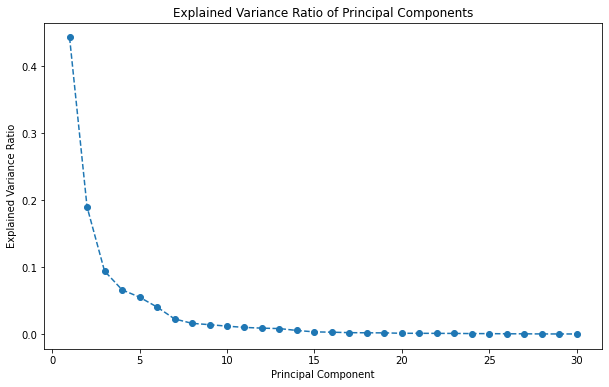

In [5]:
# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()


#### The plot of explained variance ratio versus the number of principal components usually shows a decreasing curve. Each point on this curve represents the percentage of variance explained by including that many principal components.

#### Identifying the Elbow: On the PCA explained variance ratio plot, as you move along the x-axis (number of principal components), the y-axis (explained variance ratio) initially decreases sharply and then may start to level off. The point where this leveling off begins can be considered as the "elbow" where the addition of more principal components results in diminishing returns in terms of explaining additional variance in the data.

### Cumulative Explained Variance: Plot the cumulative explained variance to see how much total variance is explained as more components are added.

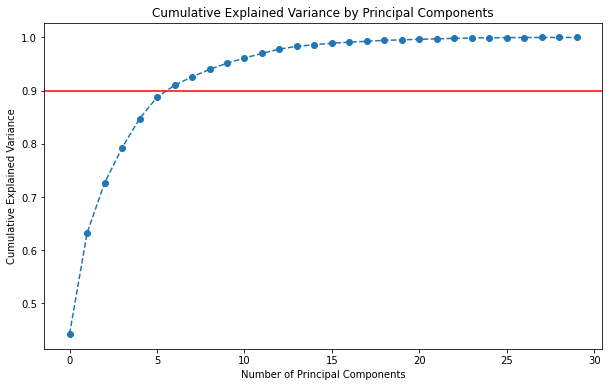

In [6]:
# Plotting cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.axhline(y=0.90, color='r', linestyle='-')  # Highlighting the 90% variance line
plt.show()

#### Evaluation of Dimensionality Reduction: The plot of cumulative explained variance helps in deciding how many principal components to retain. It shows the cumulative amount of variance explained by the principal components as you increase their number.
#### Decision Making: By observing where the curve levels off or reaches a desired threshold (e.g., 90% variance explained), you can decide on the optimal number of principal components to retain for your analysis or modeling tasks.

## Determining the Optimal Number of Components:
### This line calculates the optimal number of components based on where the cumulative explained variance reaches a desired threshold (e.g., 90%).

In [7]:
# Determining the optimal number of components based on the elbow method
explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(explained_variance >= 0.90) + 1  # 90% threshold

print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 7


## Feature Reduction

### Once you have identified the optimal number of principal components, you can transform your dataset using these components:

In [8]:
# Performing PCA again with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Identifying the most significant features for each principal component
loadings = pca_optimal.components_.T * np.sqrt(pca_optimal.explained_variance_)
feature_importance = pd.DataFrame(loadings, index=data.feature_names, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(feature_importance)

# Selecting the most important features for each principal component
important_features = []
for i in range(optimal_components):
    most_important = feature_importance.iloc[:, i].abs().nlargest(1).index[0]
    important_features.append(most_important)



                              PC1       PC2       PC3       PC4       PC5  \
mean radius              0.798469 -0.558394 -0.014334  0.058328  0.048561   
mean texture             0.378346 -0.142564  0.108454 -0.849451 -0.063575   
mean perimeter           0.829965 -0.513800 -0.015649  0.059137  0.048032   
mean area                0.806101 -0.551755  0.048220  0.075266  0.013277   
mean smoothness          0.520110  0.444392 -0.175226  0.224505 -0.469197   
mean compactness         0.872817  0.362680 -0.124485  0.044786  0.015041   
mean concavity           0.942542  0.143660  0.004593  0.026936  0.111006   
mean concave points      0.951490 -0.083016 -0.042951  0.092032 -0.056368   
mean symmetry            0.503978  0.454506 -0.067609  0.094552 -0.393183   
mean fractal dimension   0.234772  0.875292 -0.037928  0.068439 -0.057092   
radius error             0.751328 -0.252033  0.451089  0.137959 -0.198501   
texture error            0.063570  0.214849  0.629441 -0.506889 -0.246301   

In [9]:
# Creating a new dataset with the selected important features
df_important_features = df[important_features + ['target']]

# Display the first few rows of the new dataset
print(df_important_features.head())

   mean concave points  mean fractal dimension  texture error  worst texture  \
0              0.14710                 0.07871         0.9053          17.33   
1              0.07017                 0.05667         0.7339          23.41   
2              0.12790                 0.05999         0.7869          25.53   
3              0.10520                 0.09744         1.1560          26.50   
4              0.10430                 0.05883         0.7813          16.67   

   mean smoothness  worst symmetry  worst fractal dimension  target  
0          0.11840          0.4601                  0.11890       0  
1          0.08474          0.2750                  0.08902       0  
2          0.10960          0.3613                  0.08758       0  
3          0.14250          0.6638                  0.17300       0  
4          0.10030          0.2364                  0.07678       0  


In [10]:
# Save the new dataset to a CSV file
df_important_features.to_csv('important_features_dataset.csv', index=False)